## Compare experiments for different population densities

This notebook is used to compare different experiments using the same analysis pipeline.

It allows for the comparison of different population densities (seen with Optical Denisty - OD) for a fixed growth medium (LB, M9, Trypton)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config import Config
from data_comparison import DataComparison

In [3]:
config = Config(
    **{
        "threshold_nspots": 5,
        "labeling_method": "combined",
        "threshold_angle": 40,  # degrees
        "threshold_speed": 1.5,  # units consistent with POSITION_X/Y and FRAME
        "min_size_cluster": 3,
        "combination_rule": "or",
        "preprocess_to_apply_default" : None
    }
)
list_experiment_m9 = ["M9_500_0P08", "M9_100_0P28", "M9_100_0P5", "M9_100_1P2"]
list_experiment_LB = ["LB_500_0P2", "LB_500_0P4", "LB_100_0P8"]
list_experiment_try = ["Trypton_0P1", "Trypton_0P19", "Trypton_0P4"]

dc_m9 = DataComparison(list_experiment_m9, config, pre_path="data")
dc_LB = DataComparison(list_experiment_LB, config, pre_path="data")
dc_try = DataComparison(list_experiment_try, config, pre_path="data")

In [ ]:
# This takes some time to run : ~1min
dc_m9.process_all()
dc_LB.process_all()
dc_try.process_all()

⚙️ Processing experiment at data/M9_500_0P08_1
=== Experiment statistics ===
Number of tracks: 516.0
Number of tracks with more than 100 spots: 62.0
Number of spots: 22998.0
Mean speed: nan µm/s
Filtering tracks with nspots < 5
 Starting spot_df size: 22998
 Filtered spot_df size: 22484
Interpolating missing frames
Interpolated 177 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
⚙️ Processing experiment at data/M9_500_0P08_2
=== Experiment statistics ===
Number of tracks: 792.0
Number of tracks with more than 100 spots: 37.0
Number of spots: 19645.0
Mean speed: nan µm/s
Filtering tracks with nspots < 5
 Starting spot_df size: 19645
 Filtered spot_df size: 18570
Interpolating missing frames
Interpolated 391 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
⚙️ Processing experiment at data/M9_500_0P08_3
=== Experiment statistics ===
Number of tracks: 896.0
Number of t

(        FRAME     LABEL        ID  TRACK_ID   QUALITY   POSITION_X  \
 0          72  ID438374  438374.0       1.0  1.481028  1044.718849   
 1          73  ID438315  438315.0       1.0  1.219275  1044.924512   
 2          74  ID438204  438204.0       1.0  0.920981  1044.543464   
 3          75  ID438259  438259.0       1.0  0.657757  1045.810311   
 4          76  ID438175  438175.0       1.0  0.552203  1046.465351   
 ...       ...       ...       ...       ...       ...          ...   
 277823   1195  ID633498  633498.0    2667.0  0.368755   894.197845   
 277824   1196  ID633464  633464.0    2667.0  0.384234   895.573510   
 277825   1197  ID633531  633531.0    2667.0  0.395884   894.872491   
 277826   1198  ID633567  633567.0    2667.0  0.354621   894.048364   
 277827   1199  ID633602  633602.0    2667.0  0.367218   895.196426   
 
         POSITION_Y  POSITION_Z  POSITION_T  RADIUS  ...  STD_INTENSITY_CH1  \
 0       197.062059         0.0        72.0     7.5  ...          1

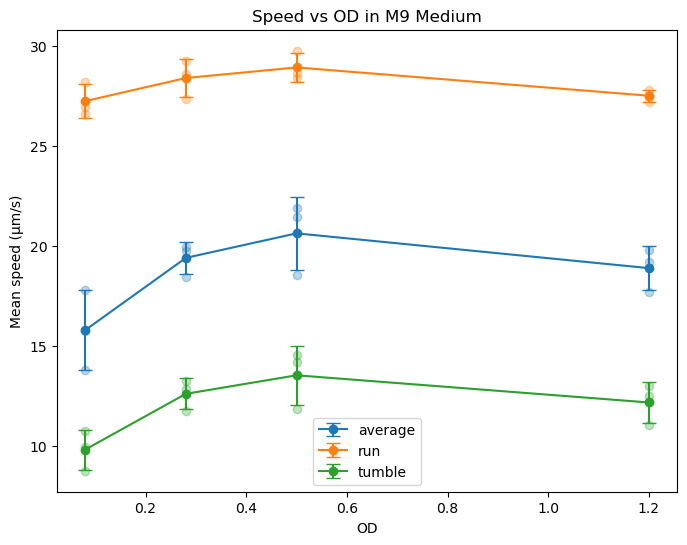

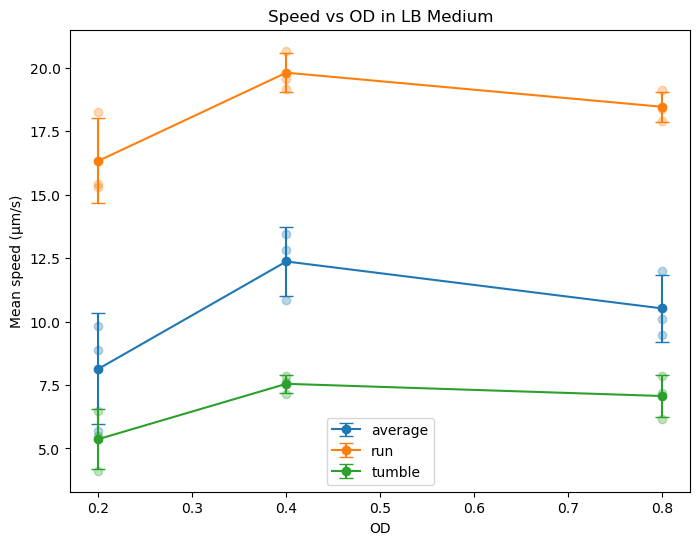

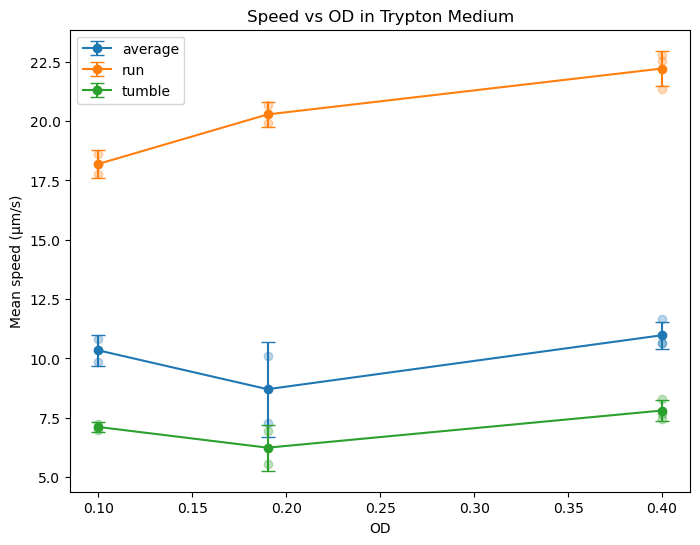

In [5]:
import matplotlib.pyplot as plt

export_plot = False

dc_m9.plot_all_speed_Od(show_plot=False)
plt.title("Speed vs OD in M9 Medium")
if export_plot : plt.savefig("images/speed_vs_OD_m9.png", dpi=300)
dc_LB.plot_all_speed_Od(show_plot=False)
plt.title("Speed vs OD in LB Medium")
if export_plot : plt.savefig("images/speed_vs_OD_LB.png", dpi=300)
dc_try.plot_all_speed_Od(show_plot=False)
plt.title("Speed vs OD in Trypton Medium")
if export_plot : plt.savefig("images/speed_vs_OD_try.png", dpi=300)